# 準備

In [1]:
import numpy as np

from model.pmm import Poisson_Mixture

(BayesModel.)model.pmmにはPoisson_Mixtureクラスとtry_pmm_model関数がある.

try_pmm_modelは飽くまでもPoisson_Mixtureが正常に動くかどうか確認するためのものである.

ここではPoisson_Mixtureの使い方等を紹介する.

In [2]:
C_t = 2 #真のコンポーネント数
D = 2 #データの次元
mr_t = np.ones(C_t)/2 #真の混合比率
tens_t = np.array([[4,1],[16,9]]) #真の強度パラメータ
N = 1000 #データ数
seed = 42 #ランダムシード

poimix = Poisson_Mixture(mr_t,tens_t,N,seed) #初期化

Poisson_Mixtureクラスの初期化の方法は3つある.

    [1]データを代入する
    [2]ポアソン混合分布のパラメータとデータ数の組を代入する
    [3]ポアソン混合分布の構造とデータ数の組を代入する

[1]は実用を想定している.
[2]と[3]は人工データを生成する.ランダムシードも指定できる.
ここでは[2]の方法で初期化している.

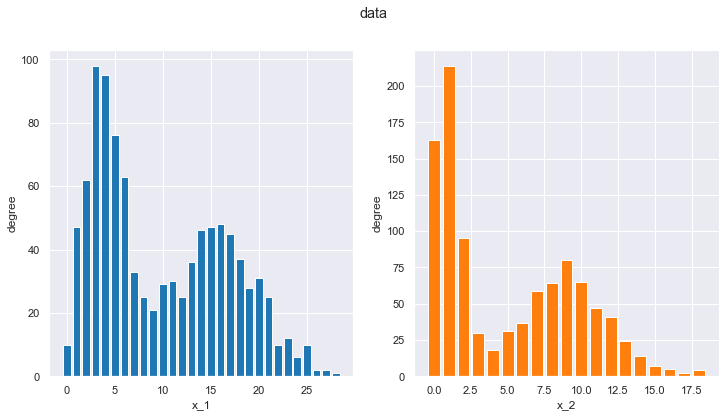

In [3]:
poimix.view_data()

view_data()メソッドでクラスが保持しているデータを見ることができる.

ただし(今の実装では)次元ごとで分かれているので,ある次元のどの山が別の次元のどれに対応しているのか判断はできないので注意.

save=Trueを指定してpdf形式で図を保存することもできる.

In [4]:
C = 2 #モデルのコンポーネント数
poimix.set_model(C,seed=seed) #モデルを準備する

set_model(C,cent,shape,scale,seed)メソッドでポアソン混合モデルの準備を行う.

実装されている推論アルゴリズムは
    
    [1]ギブスサンプリング
    [2]変分推論
    [3]崩壊型ギブスサンプリング
    
の3種類である.ただしいずれも事前分布はディリクレ分布とガンマ分布で設定される.

centはディリクレ分布の集中度,shapeとscaleはガンマ分布のそれぞれ形状母数と尺度を表す.指定しない場合は自動で設定される.

seedで決まるのは(崩壊型も含む)ギブスサンプリングの初期パラメータである.

変分推論については(今のところ)ハイパーパラメータに対称性がある(あるいは一律に設定されている)と機能しないので注意.

# ギブスサンプリング

In [5]:
ITER = 10000
poimix.GibbsSampling(ITER,seed)

burn-in...


  0%|          | 0/42 [00:00<?, ?it/s]

sampling...


  0%|          | 0/10000 [00:00<?, ?it/s]

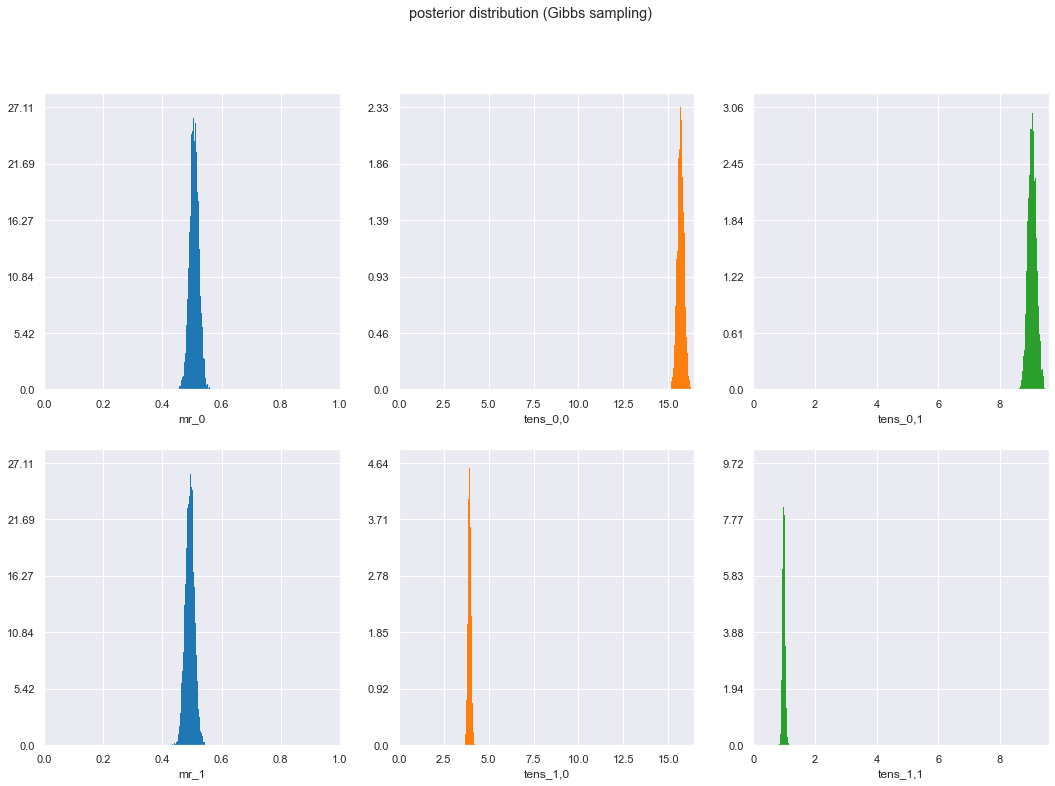

In [6]:
poimix.view_Gibbs_sample()

# 変分推論

In [7]:
poimix.VariationalInference(ITER)

  0%|          | 0/10000 [00:00<?, ?it/s]

# 崩壊型ギブスサンプリング

In [ ]:
poimix.CollapsedGibbsSampling(ITER,seed=seed)

burn-in...


  0%|          | 0/1000 [00:00<?, ?it/s]

sampling...


  0%|          | 0/10000 [00:00<?, ?it/s]